# Assignment 8: Robust linear model and Crossvalidation 
This assignment introduces Robust linear regression and Crossvalidation

* Task 1 is designed to deepen your understanding of Model Estimation 7 by using a different loss (robust) function
* Task 2 then introduces you to Polynomial (nonlinear) regression models 
* Task 3 then gets at the core concept of model complexity and overfitting 



In [1]:
## Preliminaries
import matplotlib.pyplot as plt 
import scipy.optimize as so
import pandas as pd 
import numpy as np


## Task 1: Robust regression ( / 20 pts)
### Question 1 ( / 13 pts)
Start with the function code that you wrote in homework 7. Modify the function simpleRegLossRSS to calculate the summed absolute deviation of the prediction from the data (instead of the residual sum-of-squares). Call this new function simpleRegLossSAD. Modify your simpleRegFit function (Task 3, Question 4) from Homework 7 to take a flexible loss function as a 3rd input argument. 

Now call the function with your new loss function to calculate a regression line of tailL (y) against age (x) in the possum data set (see HW7). Your function simpleRegFit should provide a plot of the fit. 

Report the R2 of your fit. 

In [2]:
df = pd.read_csv("possum.csv")

def simpleRegPredict(b, x):
    yPredicted = b[0] + b[1]*x
    return yPredicted

def plotPrediction(b,x,y,fcn = simpleRegPredict):
    plt.scatter(x, y)
    xPredict = np.linspace(min(x), max(x), num = len(x))
    plt.plot(xPredict, fcn(b, xPredict), color = 'red')

The R2 of the fit is 0.5920345193908146


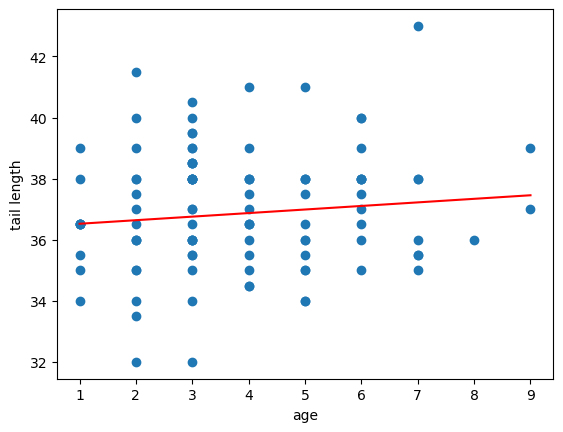

In [3]:
def simpleRegLossSAD(b, x, y):
    
    yPredict = simpleRegPredict(b, x)

    # calculate the residuals (absolute difference between the real and predicted y values)
    res = y - yPredict
    rss = abs(res)
    loss = np.sum(rss)

    # calculate the derivatives with respect to each parameter (regression coefficient)
    db0 = np.sum(-2*(res))
    db1 = np.sum(-2*x*res)
    
    #dloss/db
    deriv = [db0, db1]
    
    return loss, deriv

def simpleRegFit(x, y, fcn):
    b0 = [0,0]
    
    result = so.minimize(fcn, b0, args=(x, y), jac=True)
    
    b = result.x
    plotPrediction(b, x, y, fcn = simpleRegPredict)
    
    TSS = sum((y - np.mean(y))**2)
    
#     yPredict = b[0] + b[1]*x
#     res = y - yPredict
#     rss = res**2
#     loss = np.sum(rss)
    
    loss, d = fcn(b,x,y)
    
    R2 = 1 - (loss/TSS)

    return R2, b


R2, b = simpleRegFit(df["age"], df["tailL"], simpleRegLossSAD)
plt.xlabel('age')
plt.ylabel('tail length')
print("The R2 of the fit is", R2)

Figure 1. Scatter plot of possum age vs tail length. Red line is plotted with the optimal slope and intercept for the fit using the summed absolute deviation method.

## Question 1.2 (/7pts)
Now use your new function, but this time change the Loss function back to the residual sum of squares (RSS) Loss function from week 7. 
You should now replicate exactly the results you got for HW7, task 3, question 5. 

*Written answer: Compare the two fits you obtain with the absolute error and squared error loss function. How do they compare? Compare the $R^2$ values for both fits. Which one is lower? Why?*

The R2 of the fit is 0.014298618155431986


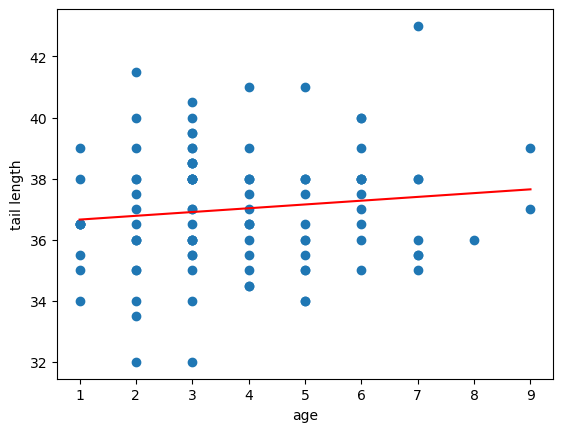

In [4]:
def simpleRegLossRSS(b, x, y):
    
    yPredict = simpleRegPredict(b, x)

    # calculate the residuals (difference between the real and predicted y values)
    res = y - yPredict
    rss = res**2
    loss = np.sum(rss)

    # calculate the derivatives with respect to each parameter (regression coefficient)
    db0 = np.sum(-2*(res))
    db1 = np.sum(-2*x*res)
    
    #dloss/db
    deriv = [db0, db1]
    
    return loss, deriv

R2, b = simpleRegFit(df["age"], df["tailL"], simpleRegLossRSS)
plt.xlabel('age')
plt.ylabel('tail length')
print("The R2 of the fit is", R2)

Figure 2. Scatter plot of possum age vs tail length. Red line is plotted with the optimal slope and intercept for the fit using the sums of squares method.

Written: The difference between the RSS and SAD function is significant when comparing the fit (R2), despite initially looking visually similar. The lower R2 is the RSS method. This is because the SAD method is more robust to outliers whereas as RSS is not. RSS is being pulled by the one really higher outlier, making it seem visually better, but is the worse fit over all. SAD uses median and RSS uses mean. 

## Task 2: Nonlinear (polynomial) regression ( / 40 pts)
For this task, we will use a new data set (fertilizer.csv), which comes from an agricultural study. Each plot of the field (a 10m-by-10m square) was given a randomly determined concentration of fertilizer (in ml/week/m2). The harvest yield for grain in kg/patch was recorded. 
The data has two fields 
- fertCon: Concentration of fertilizer
- harvest: Yield of the harvest in kg


### Question 1 ( / 5 pts)
Load the data set and make a scatter plot of fertilizer concentration on the x-axis and harvest yield on the y-axis. How would you describe the relationship? 

Text(0, 0.5, 'Harvest (kg)')

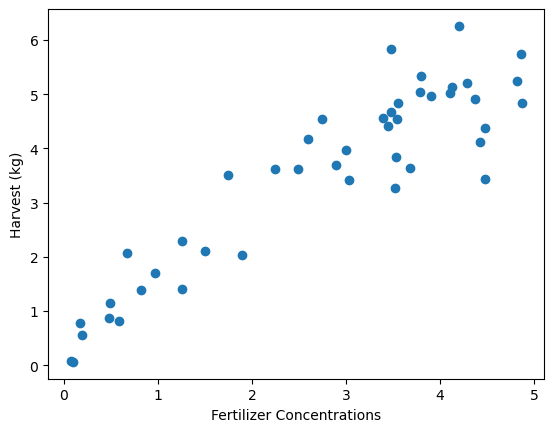

In [5]:
df = pd.read_csv("fertilizer.csv")
x = df["fertCon"]
y = df["harvest"]
plt.scatter(x, y)
plt.xlabel('Fertilizer Concentrations')
plt.ylabel('Harvest (kg)')

Figure 3. Scatter plot of fertilizer concentration and harvest yeild.

The relationship is moderately positive and linear. The slope appears to get less steep as the fertilizer concentration increases.

### Question 2 ( / 12 pts)
Write a function called polyRegPredict(b,x) which returns the prediction of a polynomial regression model on x. The length of b should indicate the order of the model. If b has length 1, the model should be of order 0 (constant). If b has length 2, it should be a linear regression model, if b has length 3, it should be quadratic model (order 2). 

Call your function with x=np.linspace(-5,5,10) and b=[-10,-4,1]. Plot the result as a scatter plot.

Text(0, 0.5, 'y')

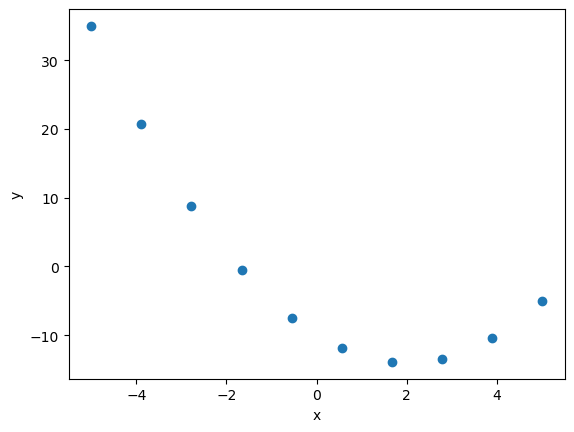

In [6]:
def polyRegPredict(b, x):
    
    yp = np.zeros(x.shape)

    for i in np.arange(len(b)): 
        yp = yp + (b[i]*(x**i))
            
    return yp

y = polyRegPredict(b = [-10, -4, 1], x = np.linspace(-5,5,10))
x = np.linspace(-5,5,10)

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')


Figure 4. Scatter plot with x=np.linspace(-5,5,10) and b=[-10,-4,1] used as arguments for y to predict the polynomial 

### Question 3 ( / 18 pts)
Modify you function simpleRegLossRSS from HW7 to become function polyRegLossRSS, which calculates the residual sum of squares and the derivatives for the polyinomial regression. Also change your function plotPrediction to use polyRegPredict. Then modify your simpleRegFit function to become polyRegFit(x,y,order), which takes the order of the polynomial fit as a third input argument. Call the function for a quadratic fit the harvest yield (y) as a function of fertilizer concentration (x).

Report the $R^2$ for the fit. 

The R2 of the fit is 0.8749779836182522


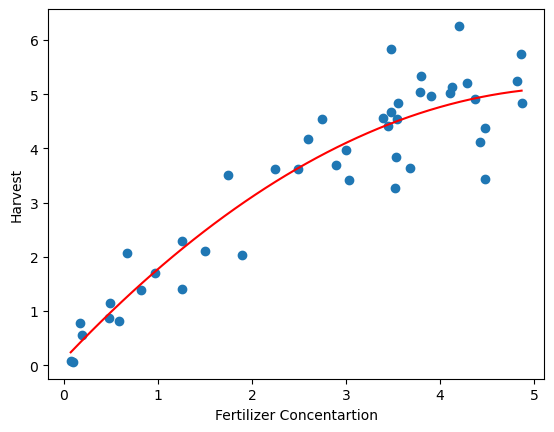

In [7]:
def polyRegLossRSS(b, x, y):
    
    yPredict = polyRegPredict(b, x)

    # calculate the residuals (difference between the real and predicted y values)
    res = y - yPredict
    rss = res**2
    loss = np.sum(rss)

    # calculate the derivatives with respect to each parameter (regression coefficient)
    
    deriv = []
    for i in range(len(b)):
        deriv.append(-2 * sum((y - polyRegPredict(b, x)) * x**i))
    
    return loss, deriv


def polyRegFit(x, y, order, fcn, fig = True):
    
    result = so.minimize(fcn, np.array([0 for i in range(order)]), args=(x, y), jac=True)
    
    b = result.x
    if fig == True:
        plotPrediction(b, x, y, fcn = polyRegPredict)
    
    TSS = sum((y - np.mean(y))**2)
    
    #yPredict = b[0] + b[1]*x
    yPredict = polyRegPredict(b,x)
    res = y - yPredict
    rss = res**2
    loss = np.sum(rss)
    
    R2 = 1 - (loss/TSS)

    return R2, b

r2, b = polyRegFit(x = df["fertCon"], y = df["harvest"], order = 3, fcn = polyRegLossRSS)
plt.xlabel('Fertilizer Concentartion')
plt.ylabel('Harvest')
print("The R2 of the fit is", r2)

Figure 5. Scatter plot of fertilizer concentration and harvest yeild. Red line is plotted for the RSS of a quadratic fit.

### Question 4 ( / 5 pts)
Call you polyRegression function to produce a polynomial fit of order 8. 

What is the $R^2$? 

The R2 of the fit is 0.9005923245191502


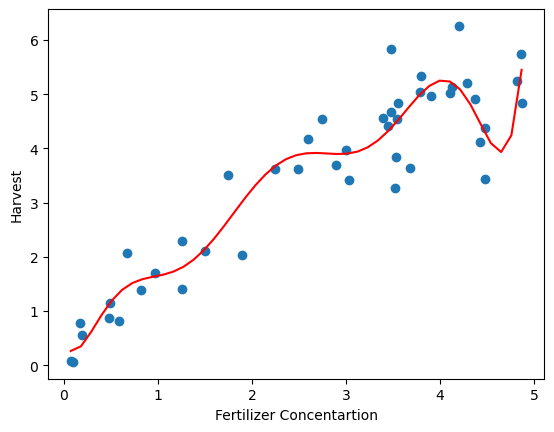

In [8]:
r2, b = polyRegFit(x = df["fertCon"], y = df["harvest"], order = 9, fcn = polyRegLossRSS)
# Order 0 = order 1... therefore order = orde1r requested+1
plt.xlabel('Fertilizer Concentartion')
plt.ylabel('Harvest')
print("The R2 of the fit is", r2)

Figure 5. Scatter plot of fertilizer concentration and harvest yeild. Red line is plotted for the RSS of order 8.

## Task 3: Cross-validation of models ( / 40 pts)
### Question 1 ( / 20 pts)
Write a function leaveOneOutCV, which takes as inputs x and y, a function to be called for the fit, optional input arguments for the fit, and a function to be called for prediction. The function should then perform leave-on-out crossvalidation and calculate the cross-validated R2. It should then fit the model to all data and calculate the fitted R2. 

*Hint:The sketch of the function can be found in the lecture.*

Call the function to get a cross-validated $R^2$ for a polynomial fit of order 8. How much lower is the crossvalidated $R^2$ than the fitted $R^2$? 

The cross validated R2 is 0.8509576392421963
The R2 is 0.9005923245191502
The difference in values is 0.049634685276953916


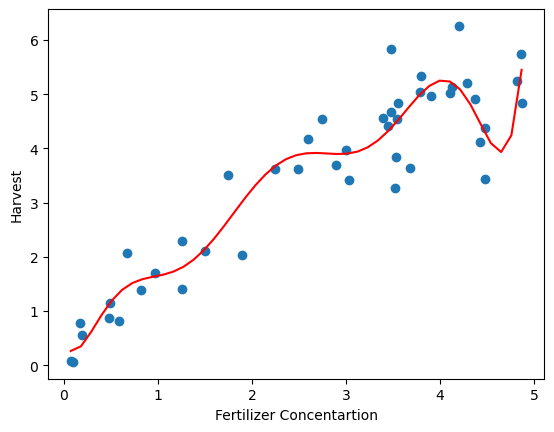

In [9]:
def leaveOneOutCV(x, y, fitfnc, predfnc, args):

    # first create an array that represent the index 
    ind = np.arange(len(df.index))

    N = len(df.index)

    yp_cv = np.zeros(N)

    # use np.array_split to generate indices for folds
    folds = np.array_split(ind, N)

    for f in np.arange(N): 
        folds_cp = folds.copy() # creating a copy of the folds array
        test_ind = folds[f] # get the indices for test set
        df_test  = df.loc[test_ind] # set one fold aside for testing


        del folds_cp[f]        # delete the test set indices
        train_ind = np.concatenate(folds_cp, axis = 0) # concatenate all the remaining indices into 1 array
        df_train  = df.loc[train_ind]


        # get the train and test x, y
        xtrain = df_train['fertCon']
        ytrain = df_train['harvest']

        xtest = df_test['fertCon']

        r,b = fitfnc(xtrain, ytrain, order = args, fcn = polyRegLossRSS, fig = False)
        yp_cv[test_ind] = predfnc(b,xtest)

    # TSS
    TSS = sum((y - y.mean())**2)

    # cross validated RSS
    RSScv = sum((y - yp_cv)**2)

    # cross validated R2
    R2cv = 1-RSScv/TSS

    # fit and predict
    r,b = fitfnc(x,y, order = args, fcn = polyRegLossRSS)
    yp = predfnc(b,x)

    # 
    TSS = sum((y-y.mean())**2)
    RSS = sum((y-yp)**2)
    R2  = 1-RSS/TSS
    
    return R2cv, R2
    
R2cv, R2 = leaveOneOutCV(x = df["fertCon"], y = df["harvest"], fitfnc = polyRegFit, predfnc = polyRegPredict, args = 9)
plt.xlabel('Fertilizer Concentartion')
plt.ylabel('Harvest')
print("The cross validated R2 is", R2cv)
print("The R2 is", R2)
print("The difference in values is", (abs(R2cv - R2)))


Figure 6. Scatter plot of fertilizer concentration and harvest yeild. Red line is plotted for the RSS of order 8.

### Question 2 ( / 20 pts)
Run a loop from model order 0 (constant) to model order 8. For each polynomial model order, call you function leaveOneOutCV to get the crossvalidated R2 and the normal R2 for each model order. Make a plot where you show the line for the crossvalidated R2 and R2 as a function of model order. When is the best crossvalidated R2 reached? When does the model start overfitting? Which model would you use to make a prediction for an unobserved data point? 

For order 0:
The cross validated R2 is -0.04597107438016601
The R2 is -2.220446049250313e-16
For order 1:
The cross validated R2 is 0.8281937042300891
The R2 is 0.8424280402361713
For order 2:
The cross validated R2 is 0.8591929622200056
The R2 is 0.8749779836182521
For order 3:
The cross validated R2 is 0.8536772943301225
The R2 is 0.8753913951668624
For order 4:
The cross validated R2 is 0.8479482333974123
The R2 is 0.875398569735774
For order 5:
The cross validated R2 is 0.8431176318551182
The R2 is 0.8775287083801128
For order 6:
The cross validated R2 is 0.8358563588665977
The R2 is 0.8776778526026782
For order 7:
The cross validated R2 is 0.8420660773068165
The R2 is 0.8884139314238679
For order 8:
The cross validated R2 is 0.8509576392421963
The R2 is 0.9005923245191502


Text(0, 0.5, 'Harvest')

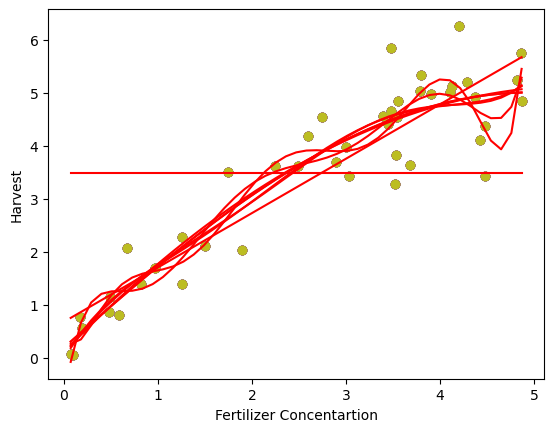

In [10]:
for i in range(1,10): # 0 to 8+1 --> 1-9+1 --> 1-10
    R2Cv, R2 = leaveOneOutCV(df["fertCon"], df["harvest"], polyRegFit, polyRegPredict, args = i)
    print(f"For order {i-1}:")
    print("The cross validated R2 is", R2Cv)
    print("The R2 is", R2)
plt.xlabel('Fertilizer Concentartion')
plt.ylabel('Harvest')

Figure 7. Scatter plot of fertilizer concentration and harvest yeild. Lines are plotted for the RSS of each order from 0-8.

The best crossvalidated R2 is reached at order 2. The model starts over fitting at order 3 as the R2 goes up but the R2CV goes down. Significant overfitting I would say starts at order 4/5. Based on this information I would use order 2 (a quadratic function) to best predict unobserved data. 